In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from datetime import datetime
from config import wkey

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

602

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Build Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + wkey

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("   Beginning Data Retrieval   ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

   Beginning Data Retrieval   
------------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | liverpool
Processing Record 3 of Set 1 | belmonte
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | moses lake
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | jumla
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | sao jose da coroa grande
Processing Record 13 of Set 1 | puerto colombia
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | annau
Processing Record 18 of Set 1 | avera
Processing Record 19 of Set 1 | thinadhoo
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | gamba
Processing Record 22 of Set 1 | rocha
Processing Record 23 of Set 1 | bathsh

Processing Record 43 of Set 4 | talara
Processing Record 44 of Set 4 | rabo de peixe
Processing Record 45 of Set 4 | teguise
Processing Record 46 of Set 4 | vangaindrano
Processing Record 47 of Set 4 | kizema
Processing Record 48 of Set 4 | saint-joseph
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | sobolevo
Processing Record 1 of Set 5 | katherine
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | dujuma
City not found. Skipping...
Processing Record 4 of Set 5 | innisfail
Processing Record 5 of Set 5 | mahebourg
Processing Record 6 of Set 5 | miranda
Processing Record 7 of Set 5 | hobro
Processing Record 8 of Set 5 | tobermory
Processing Record 9 of Set 5 | norden
Processing Record 10 of Set 5 | jiayuguan
Processing Record 11 of Set 5 | tarudant
City not found. Skipping...
Processing Record 12 of Set 5 | ancud
Processing Record 13 of Set 5 | bairiki
Processing Record 14 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing R

Processing Record 33 of Set 8 | karatau
Processing Record 34 of Set 8 | taburbah
City not found. Skipping...
Processing Record 35 of Set 8 | san patricio
Processing Record 36 of Set 8 | tigil
Processing Record 37 of Set 8 | san
Processing Record 38 of Set 8 | goderich
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | miri
Processing Record 41 of Set 8 | sirawai
Processing Record 42 of Set 8 | katsuyama
Processing Record 43 of Set 8 | voh
Processing Record 44 of Set 8 | fuyu
Processing Record 45 of Set 8 | kathmandu
Processing Record 46 of Set 8 | lae
Processing Record 47 of Set 8 | dalbandin
Processing Record 48 of Set 8 | azimur
City not found. Skipping...
Processing Record 49 of Set 8 | bukachacha
Processing Record 50 of Set 8 | tashara
Processing Record 1 of Set 9 | puqi
Processing Record 2 of Set 9 | marathon
Processing Record 3 of Set 9 | akureyri
Processing Record 4 of Set 9 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 9 | paracelis
P

Processing Record 17 of Set 12 | nha trang
Processing Record 18 of Set 12 | puerto ayacucho
Processing Record 19 of Set 12 | sakakah
Processing Record 20 of Set 12 | ust-kuyga
Processing Record 21 of Set 12 | kenai
Processing Record 22 of Set 12 | khorixas
Processing Record 23 of Set 12 | songjianghe
Processing Record 24 of Set 12 | luau
Processing Record 25 of Set 12 | erzin
Processing Record 26 of Set 12 | guantanamo
Processing Record 27 of Set 12 | gorontalo
Processing Record 28 of Set 12 | vanavara
Processing Record 29 of Set 12 | henties bay
Processing Record 30 of Set 12 | mao
Processing Record 31 of Set 12 | hamilton
Processing Record 32 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 33 of Set 12 | atambua
Processing Record 34 of Set 12 | lucapa
Processing Record 35 of Set 12 | iqaluit
Processing Record 36 of Set 12 | tokonou
Processing Record 37 of Set 12 | sal rei
Processing Record 38 of Set 12 | rawatbhata
Processing Record 39 of Set 12 | palmares do sul

In [8]:
len(city_data)

553

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,71.53,64,100,12.26,TO,2021-08-09 19:12:45
1,Liverpool,53.4106,-2.9779,66.15,67,20,3.00,GB,2021-08-09 18:59:00
2,Belmonte,-15.8631,-38.8828,73.90,69,1,7.70,BR,2021-08-09 19:12:45
3,Rikitea,-23.1203,-134.9692,73.04,82,93,8.79,PF,2021-08-09 19:12:45
4,Mataura,-46.1927,168.8643,41.49,97,70,4.54,NZ,2021-08-09 19:12:45
5,Norman Wells,65.2820,-126.8329,45.84,96,100,7.40,CA,2021-08-09 19:03:04
6,Moses Lake,47.1301,-119.2781,76.28,35,1,3.44,US,2021-08-09 19:12:46
7,Jumla,29.2747,82.1838,63.45,93,95,2.19,NP,2021-08-09 19:12:46
8,Ushuaia,-54.8000,-68.3000,49.66,53,20,6.91,AR,2021-08-09 19:12:47
9,Isangel,-19.5500,169.2667,68.79,64,27,15.82,VU,2021-08-09 19:12:47


In [10]:
new_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_order]

In [11]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-08-09 19:12:45,-21.2000,-175.2000,71.53,64,100,12.26
1,Liverpool,GB,2021-08-09 18:59:00,53.4106,-2.9779,66.15,67,20,3.00
2,Belmonte,BR,2021-08-09 19:12:45,-15.8631,-38.8828,73.90,69,1,7.70
3,Rikitea,PF,2021-08-09 19:12:45,-23.1203,-134.9692,73.04,82,93,8.79
4,Mataura,NZ,2021-08-09 19:12:45,-46.1927,168.8643,41.49,97,70,4.54


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

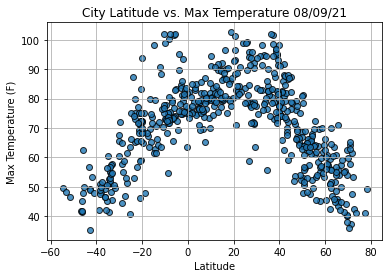

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

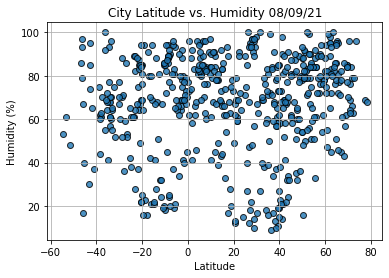

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

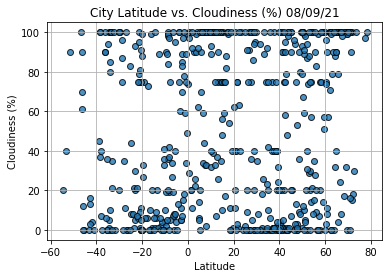

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

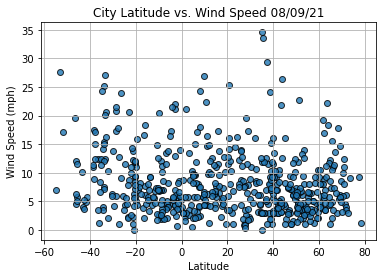

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2021-08-09 19:11:00
Lat                       71.2906
Lng                     -156.7887
Max Temp                    37.42
Humidity                       84
Cloudiness                     90
Wind Speed                   4.61
Name: 13, dtype: object

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

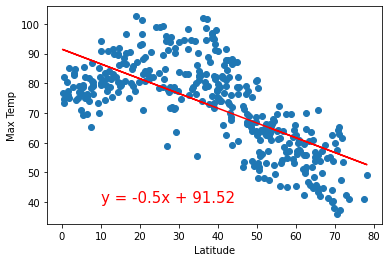

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

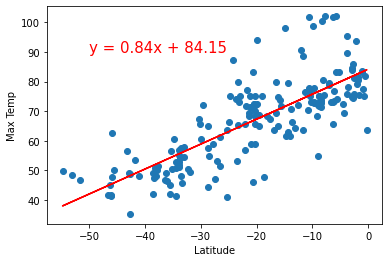

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

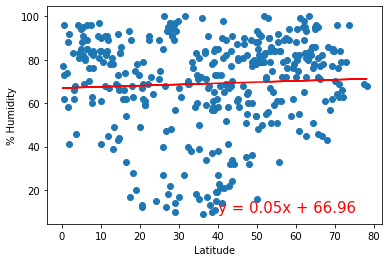

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

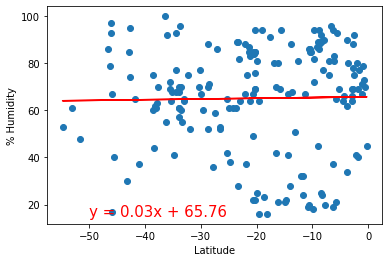

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

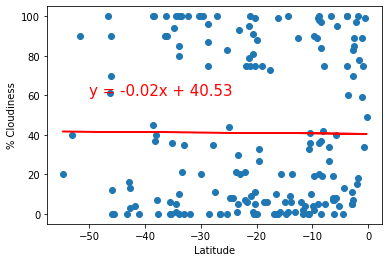

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

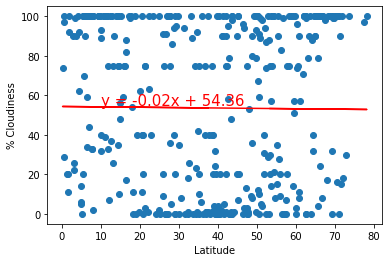

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

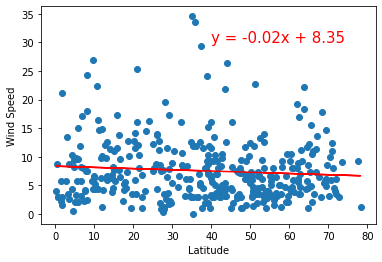

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

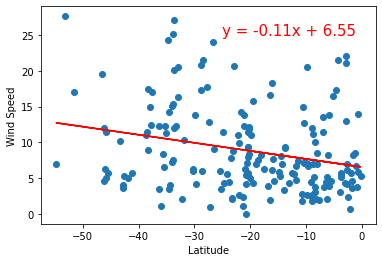

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,25))